In [2]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
load_dotenv()
import os

API_KEY = os.getenv("API_KEY")

# Run these commands when accessing your virtualenv
# virtualenv yt-data-script 
# source yt-data-script/bin/activate
# yt-data-script/bin/pip3 install google-api-python-client

DONE: A Youtube scrapper that gives information for trending videos (THE SCRAPER WORKS NOW!)

DONE (kinda): Use all of the data and then create a WordCloud involving tags or commonly used words in video titles for certain YouTube video categories

Next Feature: Be able to get data from certain searches (let's say a user 'searches' for minecraft let's play, what is commonly seen in their titles?)

**Thought: What about the recommended videos, how do I get info about these?

Next Feature: Run the information through a machine learning model for each video section that will then try to create a YouTube title based off of the data, try this for the lolz (one thing though, it's going to need, A LOT OF DATA per section)

Next Feature: Add in support for looking a certain YT creators YT channel, to see how their videos perform

Potential Feature: OAuth support for more detailed statstics for a user's own channel

Potential Feature: Create a web app that shows the video thumbnails, along with the statistics such as tags, likes, dislikes, comments, view count

** In regards to the machine learning model **
You should set up the script to collect data over the course of a couple of days to gain more data, and figure out a way to remove duplicates


In [3]:
youtube = build('youtube', 'v3', developerKey=API_KEY)

request = youtube.videos().list(
    part='snippet',
    chart='mostPopular',
    maxResults = 50
)

request2 = youtube.videoCategories().list(
    part='snippet',
    regionCode='US'
)

request3 = youtube.videos().list(
    part='statistics',
    chart='mostPopular',
    maxResults = 50
)
request4 = youtube.videos().list(
    part='snippet'
)

vidInfo = request.execute() # Holds top 50 trending video info
catInfo = request2.execute() # Holds category info
ratingInfo = request3.execute() # Holds rating info

youtube.close()

In [4]:
# Items in snippet:
# publishedAt, channelId, title, description, thumbnails, channelTitle, tags, categoryId, liveBroadcastContent, localized

# Stores the top 50 trending video titles in a list
# Index 0 being the #1 trending video

def infoReturn(response: tuple, maxResults: int, type:str, info: str):
    # IDEA: COULD THIS FUCNTION BE EDITIED TO WORK WITH MORE THAN JUST TOP 50 TRENDING?
    '''Returns an array with information related to the info input'''
    # Needs a part 'snippet' or a 'statistics' response tuple
    trendTitle = []
    for i in range(maxResults):
        if info in list(response['items'][i][type]):
            trendTitle.append(response['items'][i][type][info]) # Will break if a field is empty
        else:
            trendTitle.append("N/A")
    return trendTitle

def idToNameConvDict(response: tuple):
    '''Creates a dictionary that holds the ids for categories'''
    # Needs the category id and region id
    CatIdToCatName = {}
    for i in range(len(catInfo['items'])):
        CatIdToCatName.update({catInfo['items'][i]['id']: catInfo['items'][i]['snippet']['title']})
    return CatIdToCatName

def catIdToName(catId: dict, idArray: list):
    '''Converts a category ID array into a an array with category names'''
    catNameArray = []
    for i in range(len(catIdArray)):
        catNameArray.append(catDict[catIdArray[i]])
    return catNameArray

# The next thing to do would be to put combine each attribute into a list or dictionary for each video
# So basically making a prettier JSON file, wow lol
# Or maybe make a class which holds this info and make like fifty objects?

# Could be something like the following:
# Ranking (this is based off of the index)
# Video Title
# Description (maybe use this info to see what the most common words are in each description depending on the category ID)
# Category ID
# Views
# Likes
# Dislikes
# Maybe a ratio for likes and dislikes
# Comment data

class VideoInfo:
    def __init__(self, ranking: int, title: list, description: list, catName: list, views: list, 
        likes: list, dislikes: list, comments: list):
        # VideoInfo constructor
        self._ranking = ranking
        self._title = title
        self._description = description
        self._catName = catName
        self._views = views
        self._likes = likes
        self._dislikes = dislikes
        self._comments = comments
        # can add in a ratio
    
    def getRanking(self):
        return self._ranking

    def getTitle(self):
        return self._title
    
    def getDescription(self):
        return self._description

    def getCatName(self):
        return self._catName

    def getViews(self):
        return self._views

    def getLikes(self):
        return self._likes

    def getDislikes(self):
        return self._dislikes
    
    def getComments(self):
        return self._comments

In [5]:
# Extracting all of the information into lists
# Is there a way to extract the file name of a video, that also helps in algorithm effectiveness

catDict = idToNameConvDict(catInfo) # Holds the ids for category name

titleArray = infoReturn(vidInfo, 50, 'snippet', 'title') # Holds the title trending array
catIdArray = infoReturn(vidInfo, 50, 'snippet', 'categoryId') # Holds the categoryId information
tagArray = infoReturn(vidInfo, 50, 'snippet', 'tags') # Holds tags for each video
descArray = infoReturn(vidInfo, 50, 'snippet', 'description') # Holds description for each video
channelNameArray = infoReturn(vidInfo, 50, 'snippet','channelTitle') # Holds channel names
thumbnailArray = infoReturn(vidInfo, 50, 'snippet','thumbnails') # Holds thumbnail links, needs more parsing
viewsArray = infoReturn(ratingInfo, 50, 'statistics', 'viewCount') # Holds viewcount
likeArray = infoReturn(ratingInfo, 50, 'statistics', 'likeCount') # Holds like count
dislikeArray = infoReturn(ratingInfo, 50, 'statistics', 'dislikeCount') # Holds dislike count
commentArray = infoReturn(ratingInfo, 50, 'statistics', 'commentCount') # Holds comment count
catNameArray = catIdToName(catDict, catIdArray) # Holds the name of each category id

In [6]:
vidClass = []
# Makes an array that holds 50 video objects
for i in range(50):
    videoClass = VideoInfo(i+1, titleArray[i], descArray[i], catNameArray[i], viewsArray[i], likeArray[i], dislikeArray[i], commentArray[i])
    vidClass.append(videoClass)

Analysis and Machine Learning Time!

,Title,Description,Category Name
1,"$1,000,000 Influencer Tournament!",That was so close at the end I can't believe t...,Entertainment
2,"Tom Holland, Zendaya & Jacob Batalon Answer MO...","Spider-Man: No Way Home stars Tom Holland, Zen...",Entertainment
3,Watch this beaker disappear,"Check out my main channel: this one, I want t...",Science & Technology
4,🤯 IS THE TOMATO REALLY AN APPLE? 🤯 Photography...,Thanks for watching. I am glad if I could ente...,Entertainment
5,How I survived middle school mean girls,"IM RUBBER, YOURE GLUE, WHATEVER U SAY BOUNCES ...",Film & Animation
6,I'm Back!!-I survived Covid,Thanks to Bespoke Post for sponsoring this vid...,People & Blogs
7,ALL Fortnite Winterfest gifts 2021 OPENED | FR...,Winterfest is here! Fortnite are giving away t...,Gaming
8,Quick tip for using chopsticks in Korea,,Education
9,Nidal gave his crush the ULTIMATE GIFT,"In the ultimate surprise, we flew back out to ...",Entertainment
10,George Harrison - My Sweet Lord (Official Musi...,Official Music Video for George Harrison “My S...,Music


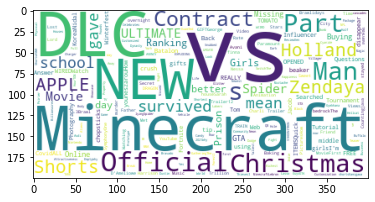

In [8]:
import emoji
import re
from wordcloud import WordCloud, STOPWORDS

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def cleanData(text):
    '''Removes emojis, links, and \n from text'''
    text = text.strip()
    text = re.sub("\n","", text)
    text = re.sub("\r","", text)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) # not removing https things?
    return text

# Use modules such as the WordCloud, NLTK, spaCy, and others to process the most common words
# Try separating these words based upon the categories they exists, pandas should help with this!
df = pd.DataFrame(columns = ['Title', 'Description', 'Category Name'])

# Have to remove emojis from text strings
for i in range(50):
    title = cleanData(vidClass[i].getTitle()) # cleans text
    description = cleanData(vidClass[i].getDescription())
    catName = vidClass[i].getCatName()
    df = df.append({'Title': title, 'Description': description, 
        'Category Name': catName}, ignore_index = True)

df.index += 1
df.to_csv('yt-data.csv')

megaString = ""

for i in range(50):
    megaString = megaString + df['Title'].iloc[i]


wordcloud = WordCloud(random_state=1, stopwords= STOPWORDS, background_color = 'white').generate(megaString)

#wordCloud = WordCloud().generate_from_frequencies(df['Description'])
plt.imshow(wordcloud)
df